<a href="https://colab.research.google.com/github/sebastianrpo/SPIII_MiniP2/blob/main/MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones**
##### Tratamiento de Señales III
##### Facultad de Ingeniería
##### Universidad de Antioquia
##### Daniela Acevedo Zuluaga - Sebastian Restrepo Valencia
##### 2023-1

## Carga de archivos e importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
!wget "https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/dfMinip1.csv?raw=true" -O "dfMinip1.csv"

--2023-05-06 16:05:19--  https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/dfMinip1.csv?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/dfMinip1.csv [following]
--2023-05-06 16:05:19--  https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/dfMinip1.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/dfMinip1.csv [following]
--2023-05-06 16:05:19--  https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/dfMinip1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [3]:
data = pd.read_csv('dfMinip1.csv') # Cargamos el dataframe.
data

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),...,Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Tipo
0,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
1,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
2,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
3,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
4,0.013380,22.882812,13.767863,0.002846,0.000005,0.013380,0.000306,0.018768,1.183594,9.166453,...,0.018768,0.000598,0.013646,1.183594,10.723613,0.003142,6.561553e-06,0.013646,0.000029,Tele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.036245,1.380859,7.507878,0.004065,0.000034,0.036245,0.000221,0.004788,24.658203,0.961714,...,0.004788,0.000264,0.006026,38.466797,1.001902,0.001036,1.335983e-06,0.006026,0.000015,Reg
59,0.034564,1.380859,6.904288,0.003953,0.000031,0.034564,0.000186,0.006359,49.513672,1.123659,...,0.006359,0.000016,0.003872,17.162109,0.617351,0.001213,4.200849e-07,0.003872,0.000226,Reg
60,0.032889,1.380859,6.158012,0.003702,0.000027,0.032889,0.000144,0.009995,49.908203,1.487689,...,0.009995,0.000056,0.003723,16.767578,0.627101,0.001126,3.440663e-07,0.003723,0.000213,Reg
61,0.032889,1.380859,6.158012,0.003702,0.000027,0.032889,0.000144,0.009995,49.908203,1.487689,...,0.009995,0.000056,0.003723,16.767578,0.627101,0.001126,3.440663e-07,0.003723,0.000213,Reg


In [4]:
dataSismo = np.asarray(data.drop('Tipo',1))
Tipo = data['Tipo'].tolist()

# Creamos una lista de etiquetas numéricas.
Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0       # El valor de 0 corresponde a los telesismos
for j in range(21,42,1):
  Tags[j] = 1       # El valor de 1 corresponde a los sismos locales
for l in range(42,63,1):
  Tags[l] = 2       # El valor de 2 corresponde a los sismos regionales

<ipython-input-4-76cc3247ff9e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataSismo = np.asarray(data.drop('Tipo',1))


In [5]:
pca = PCA(n_components = 21)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 22)
Z Projection size:  (63, 21)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05
 1.13825001e-05 9.03441360e-08 4.41552724e-08 1.17915114e-08
 3.67223545e-09 1.18479956e-09 9.94674999e-10 1.63050925e-11
 4.32903169e-13 1.59888481e-13 6.40000309e-34 7.44314709e-37
 1.38020704e-37]
W Projection size:  (21, 21)


(21,) 
 Explained variance 0.9818457699615174


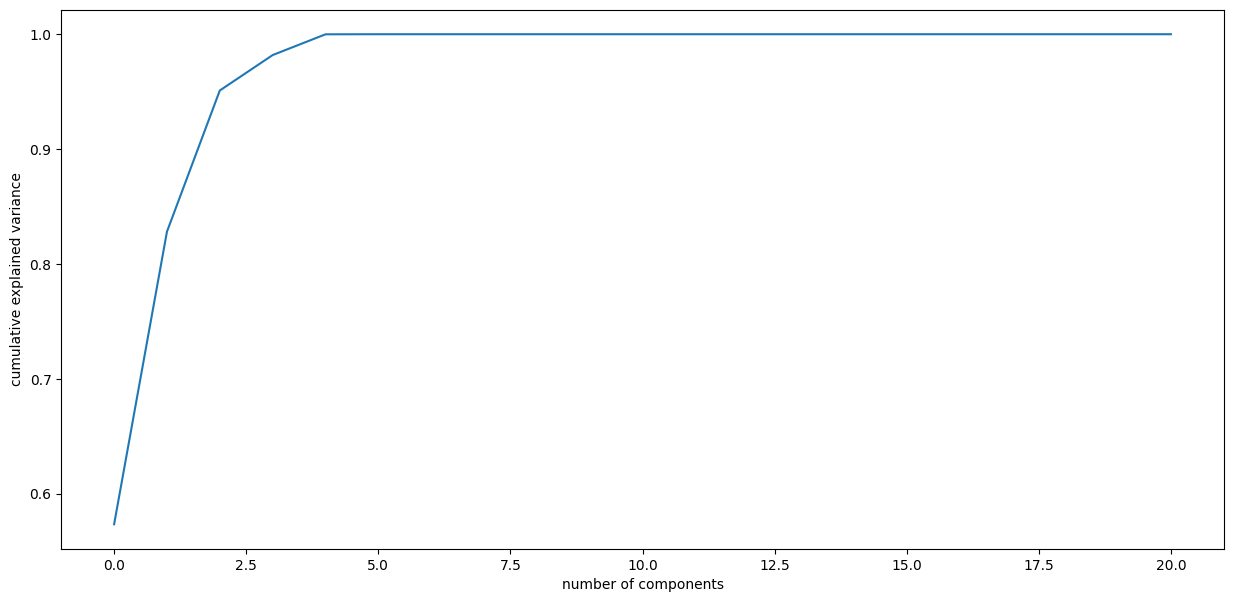

In [6]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:4]))
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Al llegar a las 5 componentes ya se obtiene un 99.9% de la varianza, por lo que solo antes de las 5 componentes se pueden observar cambios significativos en los datos proyectados

<ipython-input-7-fccd6acffa84>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))


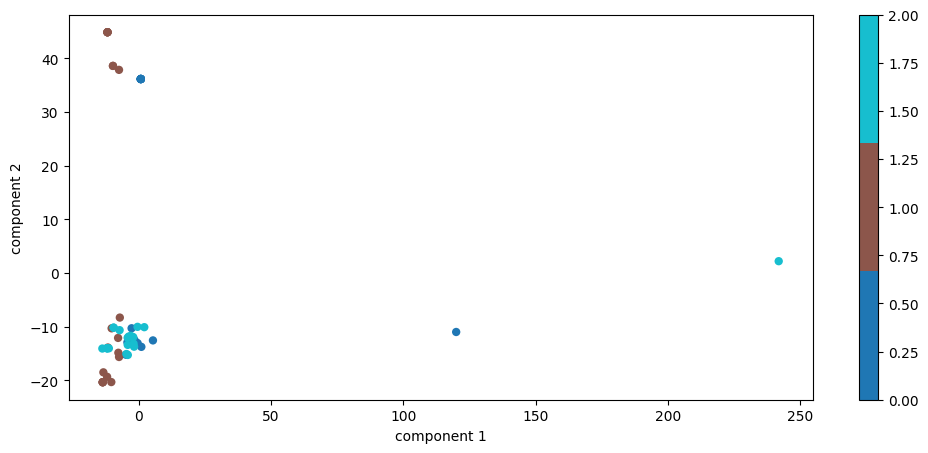

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [8]:
def projectedZ_Components(n,data):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 21)
Z Projection size:  (63, 2)
PCA explained variance:  [1237.16959613  549.45863779]
W Projection size:  (2, 21)


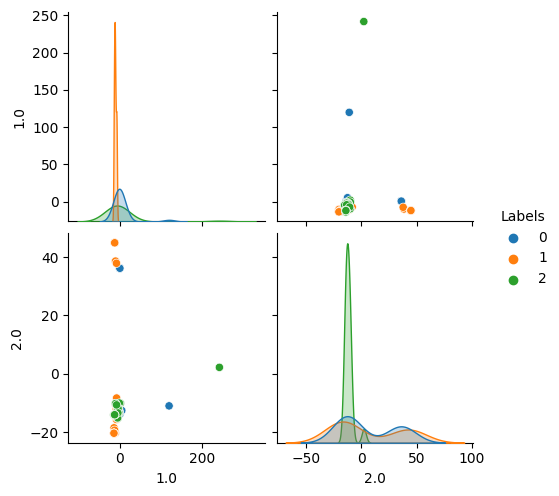

In [9]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 4)
PCA explained variance:  [1237.16959613  549.45863779  265.10066955   66.52437816]
W Projection size:  (4, 21)


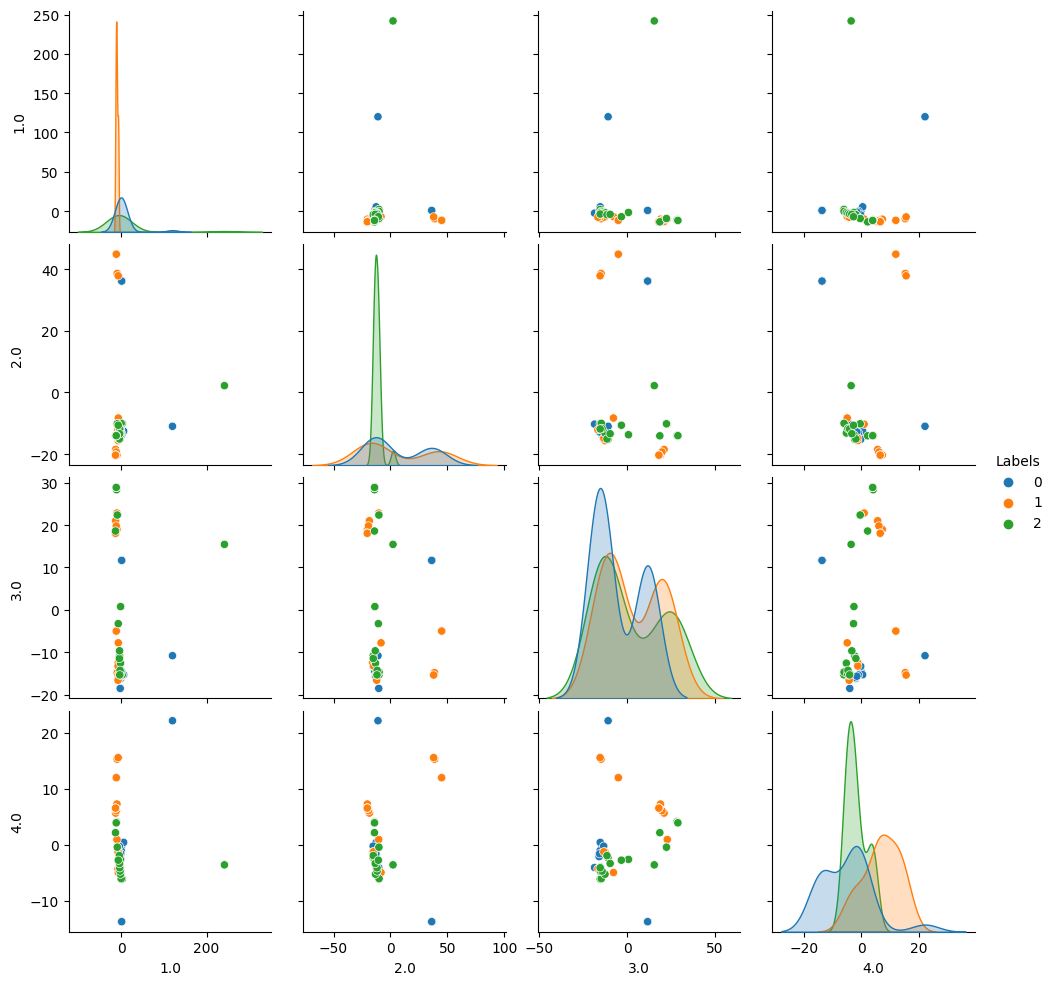

In [10]:
n = 4
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 8)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05]
W Projection size:  (8, 21)


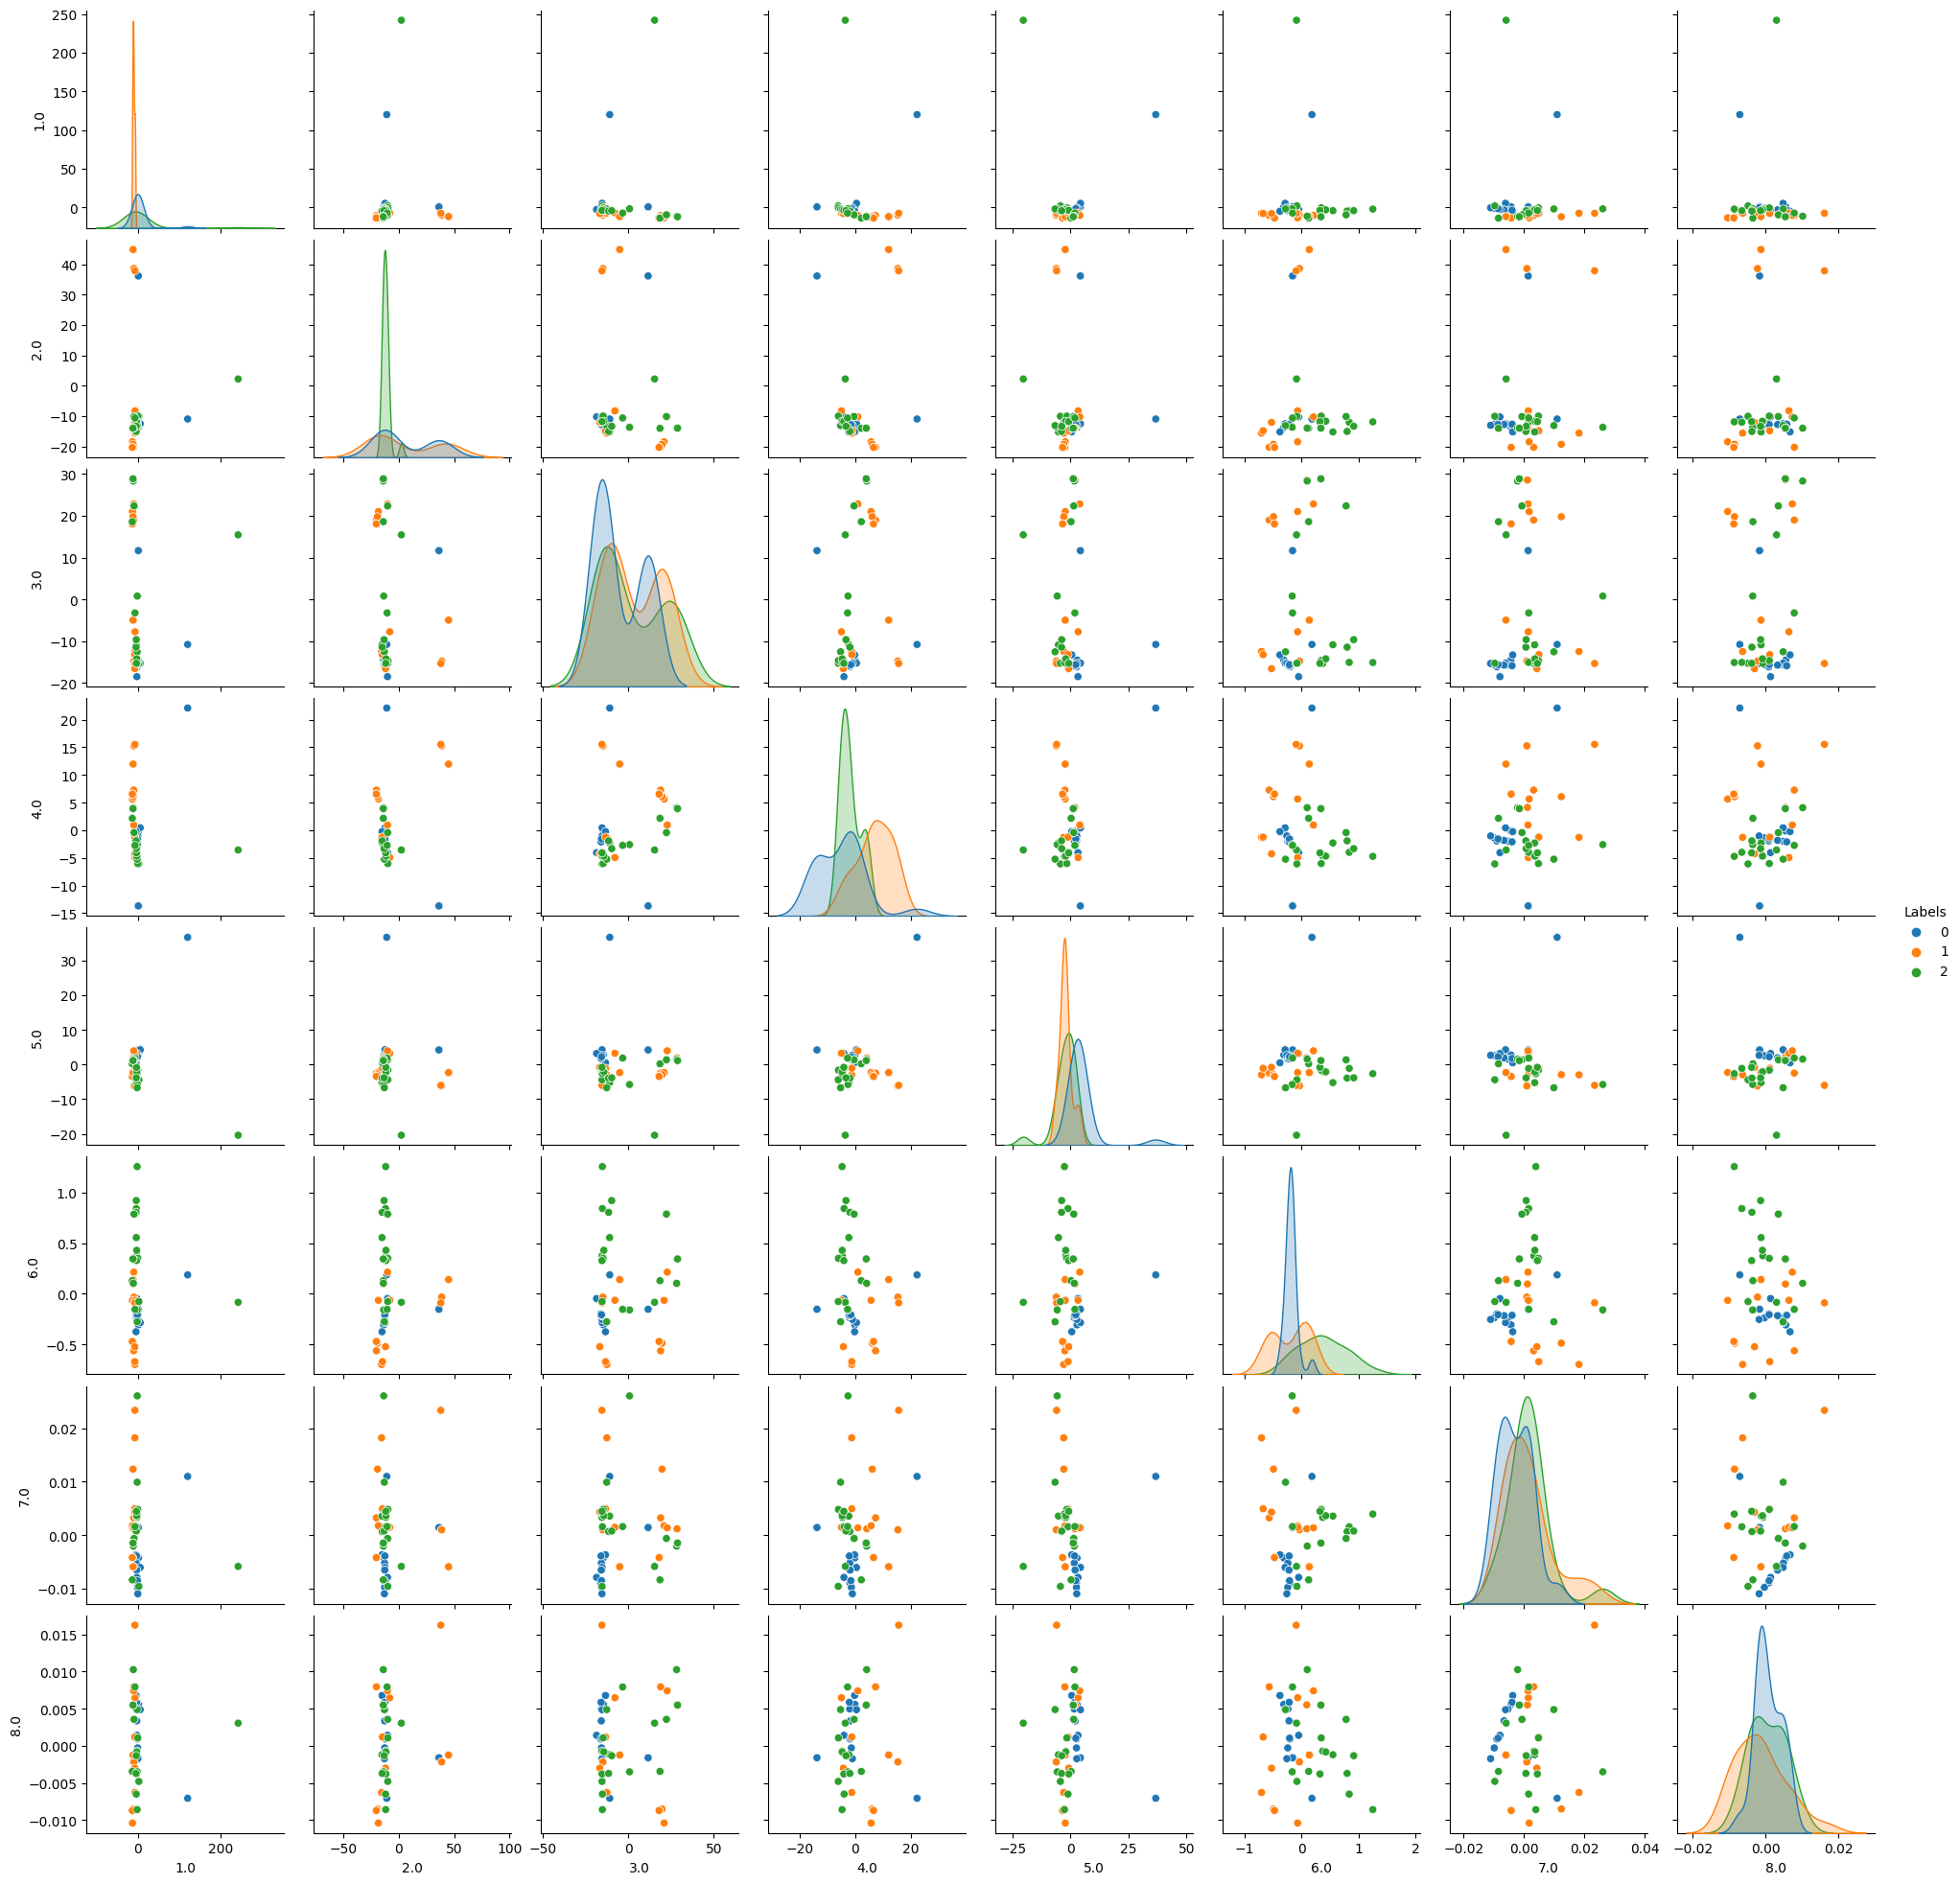

In [11]:
n = 8
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Para el análisis, se debe tener en cuenta que las etiquetas azules son Telesismo, las naranjadas son local y las verdes son regional.

En las primeras 4 componentes, no se logra observar un cambio, y todos los puntos siguen bastante agrupados. En 5 se pueden empezar a notar algunos desagrupamientos leves. En 6 componentes, se pueden observar algunos agrupamientos entre colores, y aunque no es muy notorio si da resultados mejores a los que se tenían en el miniproyecto 1. Al ir graficando nuevas componentes, se ve que el modelo pasa a tener una especie de sobreentrenamiento, y ya a pesar de tener más componentes, la información que se agrega pasa a ser contraproducente y nos daña la separación de los sismos que se logra con 6 componentes.

In [35]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Accuracy Train: ',Acc_train)
  print('Accuracy Test: ',Acc_test)

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
  ax1.plot()
  ax1.ax_.set_title('Matriz Confusión LR train')
  plt.show()

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
  ax2.plot()
  ax2.ax_.set_title('Matriz Confusión LR test')
  plt.show()
  return None

def Bayessian_Regression(X, t):
  pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
  pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
  pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

  # Seleccionamos los X de la clase 1
  X1 = X[t == 0]
  mu_C1 = np.mean(X1,axis = 0)
  # Seleccionamos los X de la clase 2
  X2 = X[t == 1]
  mu_C2 = np.mean(X2,axis = 0)
  # Seleccionamos los X de la clase 3
  X3 = X[t == 2]
  mu_C3 = np.mean(X3,axis = 0)

  plt.scatter(X[:,0],X[:,1],c = t)
  plt.plot(mu_C1[0],mu_C1[1],'or')
  plt.plot(mu_C2[0],mu_C2[1],'dg')
  plt.plot(mu_C3[0],mu_C3[1],'sy')

  N1 = np.sum(np.where(t == 0, 1., 0.))
  MU_1 = np.tile(mu_C1,(np.int(N1),1))
  S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)

  N2 = np.sum(np.where(t == 1, 1., 0.))
  MU_2 = np.tile(mu_C2,(np.int(N2),1))
  S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

  N3 = np.sum(np.where(t == 2, 1., 0.))
  MU_3 = np.tile(mu_C3,(np.int(N3),1))
  S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

  N = N1 + N2 + N3
  Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

  invSigma = np.linalg.inv(Sigma)
  w_C1 = invSigma@mu_C1
  w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

  w_C2 = invSigma@mu_C2
  w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

  w_C3 = invSigma@mu_C3
  w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

  # Para las activaciones
  A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
  A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
  A3 = (X@w_C3 + w_30).reshape(np.int(N),1)
  A = np.concatenate((A1,A2,A3),axis = 1)

  expA = np.exp(A)
  aux = np.sum(expA,axis = 1).reshape(int(N),1)
  auxM = np.tile(aux,(1,3))

  p_Ck_dado_X =  expA/auxM # Posterior: y_Est
  t_Est = np.argmax(p_Ck_dado_X, axis = 1)

  Acc = accuracy_score(t,t_Est)
  cMat = confusion_matrix(t,t_Est)

  print('Accuracy: ',Acc)
  
  ax = ConfusionMatrixDisplay(cMat, display_labels = ['telesismo','local','regional'])
  ax.plot()
  plt.show()
  return None

## Regresión logística para los datos de entrada


Accuracy Train:  0.6808510638297872
Accuracy Test:  0.8125


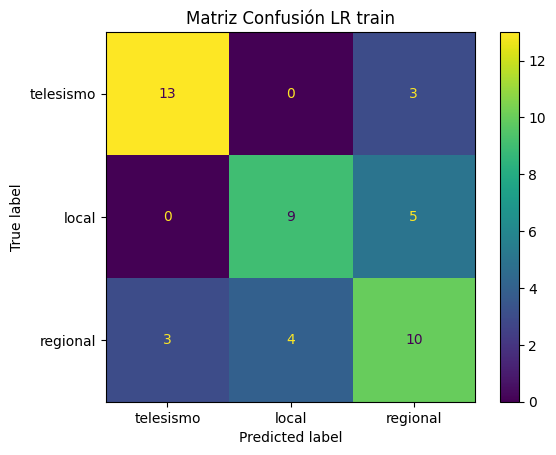

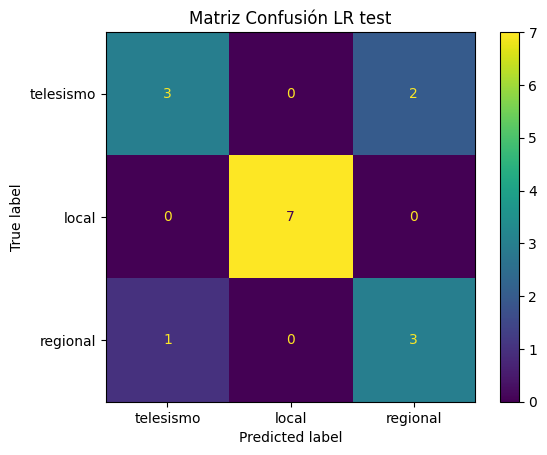

In [36]:
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Train:  1.0
Accuracy Test:  0.875


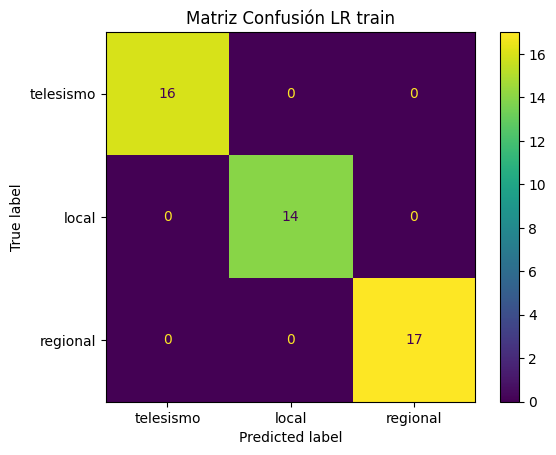

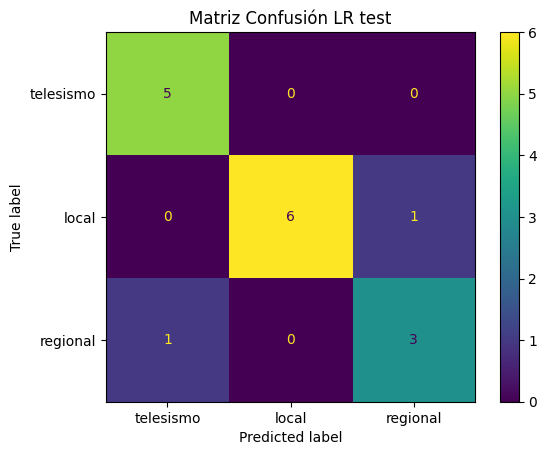

In [37]:
X = dataSismo[:, :]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)

Se puede observar que tomando dos dimensiones se tiene una precisión de entrenamiento del 68% pero si tomamos todas las dimensiones se tiene una precisión del 100%.

## Regresión logística para el espacio latente

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Train:  1.0
Accuracy Test:  0.875


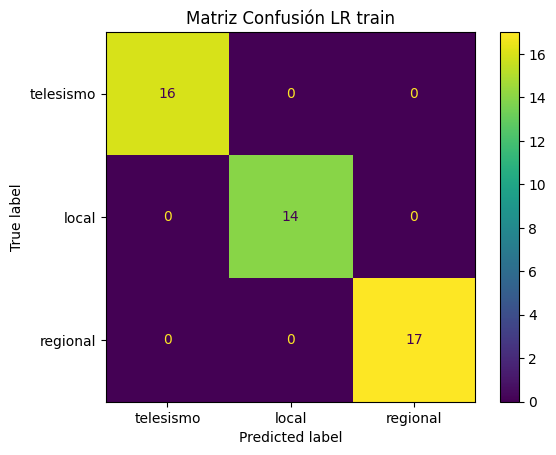

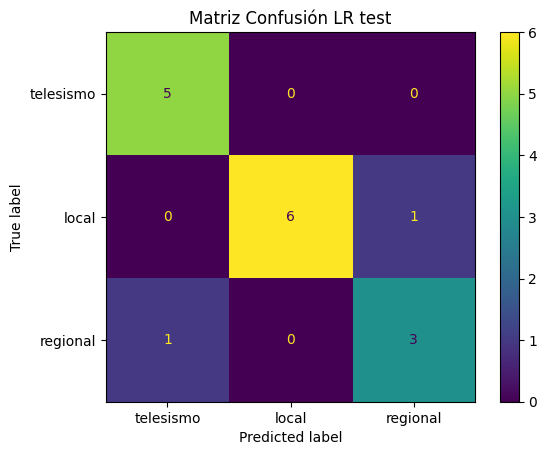

In [38]:
n=1
modelPCA = PCA(n_components=n)
X = dataSismo
X_PCA = pca.fit_transform(X)
Y = Tags
Logistic_Regression(X_PCA,Y)

En el espacio latente, al estar utilizando PCA, con solo tener un n=1 ya funciona con una precisión del 100%. 

## Clasificación Bayesiana para los datos del espacio de entrada

<ipython-input-35-4d3def55488a>:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MU_1 = np.tile(mu_C1,(np.int(N1),1))
<ipython-input-35-4d3def55488a>:55: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

Accuracy:  0.5873015873015873


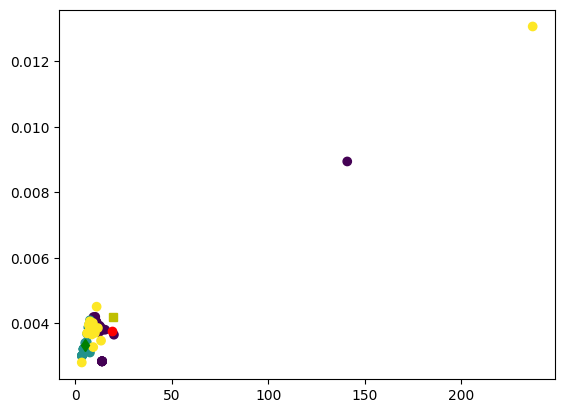

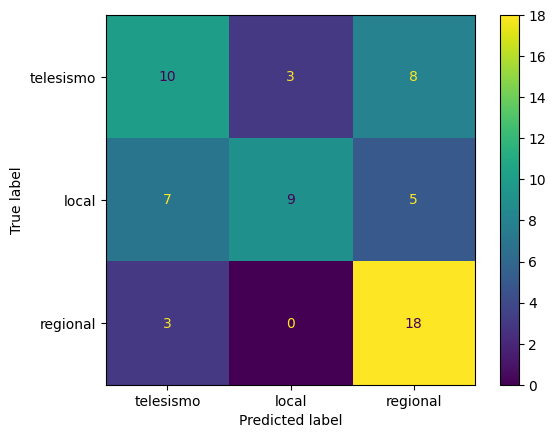

In [40]:
X = dataSismo[:, 2:4]
t = np.array(Tags)
Bayessian_Regression(X, t)

## Clasificacion Bayesiana para los datos del espacio latente

<ipython-input-35-4d3def55488a>:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MU_1 = np.tile(mu_C1,(np.int(N1),1))
<ipython-input-35-4d3def55488a>:55: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

Accuracy:  0.9047619047619048


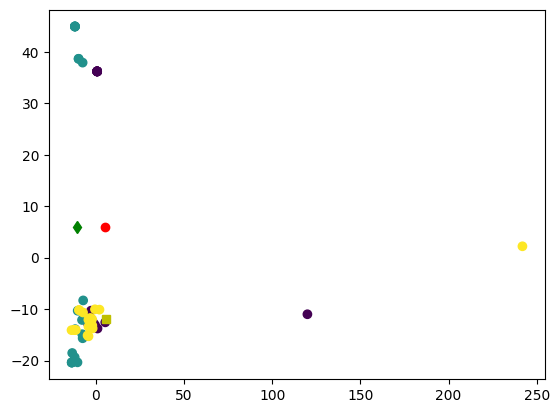

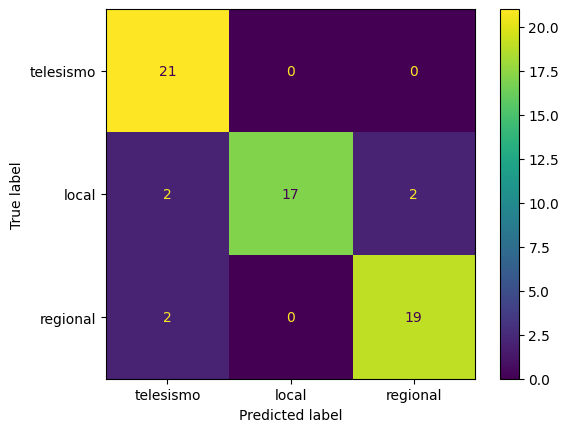

In [41]:
n = 8
modelPCA = PCA(n_components=n) # Hacemos PCA con n componentes.
X = dataSismo 
X_PCA = modelPCA.fit_transform(X)
t = np.array(Tags)
Bayessian_Regression(X_PCA, t)
     

Si se compara con la regresión logística, se puede ver claramente que se tienen peores resultados en la Bayesiana. Esto se puede deber a que la regresión logística puede funcionar mejor que la Bayesiana cuando se tienen grandes cantidades de datos o también a que la regresión logística es menos sensible a los valores atípicos y datos ruidosos que el modelo bayesiano

# Visualización de rostros

## En el espacio de entrada

Text(0, 0.5, '-dim\nreconstruction')

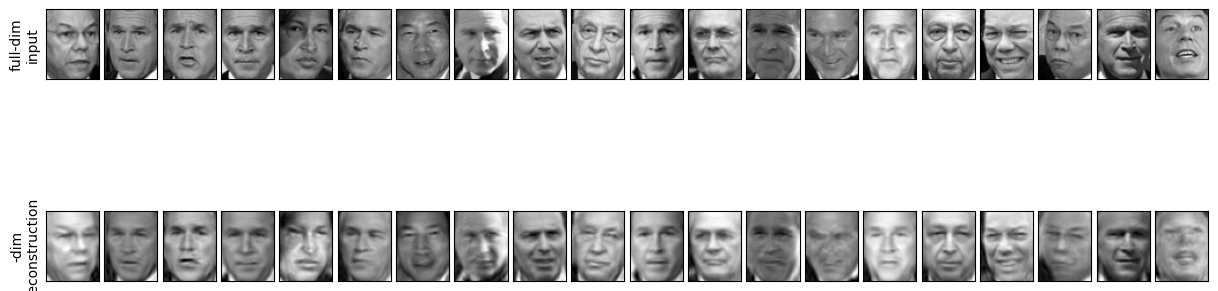

In [42]:
faces = fetch_lfw_people(min_faces_per_person=60)
X_vectores = faces.data
pca = PCA(n_components = 128,svd_solver='randomized').fit(faces.data)
pca.fit(X_vectores)
Z = pca.transform(X_vectores)
projected = pca.inverse_transform(Z)

fig, ax = plt.subplots(2, 20, figsize=(15,5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(20):
    ax[0, i].imshow(X_vectores[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('-dim\nreconstruction')

## En el espacio latente

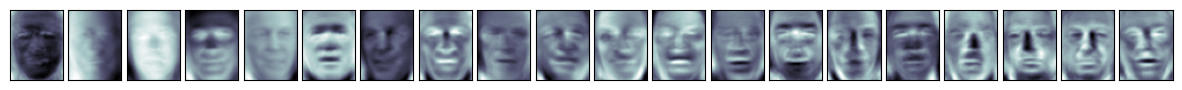

In [43]:
Wprojection = pca.components_
PC1 = Wprojection[0]

fig, axes = plt.subplots(1, 20, figsize=(15, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

Se preprocesan los datos para seleccionar solo aquellas imágenes que tienen al menos 60 apariciones en el conjunto de datos. Se extraen las características (vectores) de cada imagen facial del conjunto de datos y se utilizan para ajustar un modelo de PCA con 128 componentes principales. Al analizar las mismas observamos que algunos de estos rostros son identificables a simple vista, mientras que otros tienen características que los hacen dificiles de reconocer, pero que para nuestro algoritmo representan características importantes que pueden ser utilizadas en el proceso de clasificación de las imagenes.

## Reconocimiento con los Eigenfaces mediante regresión logística